# Data fields
- ID - an ID for this instance
- Area - (A), The area of a bean zone and the number of pixels within its boundaries.
- Perimeter - (P), Bean circumference is defined as the length of its border.
- MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio - (K), Defines the relationship between L and l.
- Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.
- ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area.
- Extent - (Ex), The ratio of the pixels in the bounding box to the bean area.
- Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness - (R), Calculated with the following formula: (4piA)/(P^2)
- Compactness - (CO), Measures the roundness of an object: Ed/L
- ShapeFactor1 - (SF1)
- ShapeFactor2 - (SF2)
- ShapeFactor3 - (SF3)
- ShapeFactor4 - (SF4)
- y - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/sample_submission.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv


 
## <span style='color:#5499C7 '> Importing libraries  </span>


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

 
## <span style='color:#5499C7 '> Loading to dataframe </span>


In [3]:
df_train = pd.read_csv(os.path.join(dirname, 'train.csv'))
df_test = pd.read_csv(os.path.join(dirname, 'test.csv'))
print("Shape before deleting duplicate values: {}.\n\n".format(df_train.shape))

df_train.head()


Shape before deleting duplicate values: (10834, 18).




,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


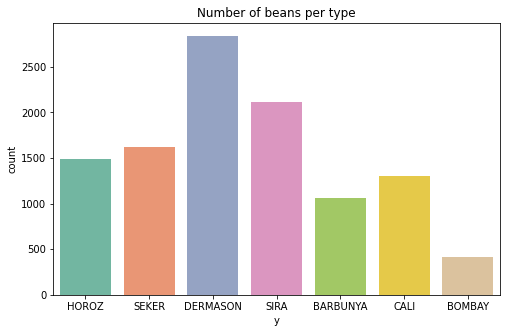

In [4]:
plt.figure(figsize = (8, 5))
sns.countplot(x = df_train["y"], palette="Set2")
plt.title("Number of beans per type")
plt.show()

 
## <span style='color:#5499C7 '> data pre pro</span>


In [5]:
COLUMNS = df_train.columns.tolist()
for c in COLUMNS:
    if df_train[c].isnull().values.any():
        print('{0}: {1} invalid values found'.format(c, df_train[c].isnull().sum()))
    else:
        print('{0}: ok'.format(c))

ID: ok
Area: ok
Perimeter: ok
MajorAxisLength: ok
MinorAxisLength: ok
AspectRation: ok
Eccentricity: ok
ConvexArea: ok
EquivDiameter: ok
Extent: ok
Solidity: ok
roundness: ok
Compactness: ok
ShapeFactor1: ok
ShapeFactor2: ok
ShapeFactor3: ok
ShapeFactor4: ok
y: ok


In [6]:
df_train.dtypes


ID                   int64
Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
y                   object
dtype: object

In [7]:
df_train.dtypes

ID                   int64
Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
y                   object
dtype: object

### only target value need encoding tech

In [8]:
df_train.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,5416.500000,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,3127.650742,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,0.000000,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,2708.250000,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,5416.500000,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,8124.750000,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,10833.000000,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


# the dataset is imbalanced. 
#### we need to splite data in away that all samples are well represented in train dataset 


## splite data for train and validate 

In [9]:
from sklearn.model_selection import train_test_split

X, X_val, y, y_val  = train_test_split(df_train,df_train['y'],
                                    stratify=df_train['y'],
                                    test_size=0.2,
                                    random_state=42,
                                    shuffle=True)


X =X.drop(columns=['ID','y'])
X_val = X_val.drop(columns=['ID','y'])


# settings to display all columns
pd.set_option("display.max_columns", None)


In [10]:
y.value_counts()

DERMASON    2270
SIRA        1687
SEKER       1297
HOROZ       1190
CALI        1043
BARBUNYA     846
BOMBAY       334
Name: y, dtype: int64

# add new feature circular


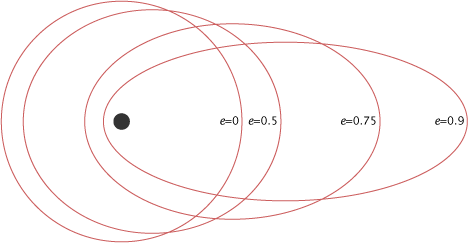

In [11]:
#measure of deviation from roundness
X['circular'] = X['Eccentricity'] * X['AspectRation']
X_val['circular'] = X_val['Eccentricity'] * X_val['AspectRation']
df_test['circular'] = df_test['Eccentricity'] * df_test['AspectRation']



X.head(20)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,circular
1176,85446,1104.639,431.766247,254.775038,1.694696,0.807347,86852,329.838182,0.819013,0.983812,0.879956,0.763928,0.005053,0.001062,0.583585,0.989000,1.368209
3931,46826,851.033,348.057690,172.358999,2.019376,0.868778,47442,244.173534,0.810138,0.987016,0.812464,0.701532,0.007433,0.001111,0.492147,0.993830,1.754389
10363,57649,896.189,323.546760,228.391768,1.416631,0.708311,58415,270.926164,0.789161,0.986887,0.901991,0.837363,0.005612,0.001702,0.701177,0.993309,1.003415
9720,41826,772.831,294.586813,181.312184,1.624749,0.788153,42287,230.769403,0.800222,0.989098,0.880009,0.783366,0.007043,0.001636,0.613663,0.997048,1.280551
8455,34879,689.973,236.193130,188.398162,1.253691,0.603128,35298,210.735194,0.769786,0.988130,0.920682,0.892216,0.006772,0.002647,0.796049,0.997999,0.756136
5402,73499,1071.953,377.994436,247.950444,1.524476,0.754793,74611,305.911480,0.743766,0.985096,0.803785,0.809302,0.005143,0.001361,0.654969,0.998484,1.150663
10662,53171,907.287,366.221271,186.294634,1.965818,0.860947,53900,260.191122,0.752651,0.986475,0.811700,0.710475,0.006888,0.001083,0.504775,0.992296,1.692465
5660,47291,861.047,354.542925,170.402977,2.080615,0.876925,47849,245.382908,0.772123,0.988338,0.801557,0.692111,0.007497,0.001061,0.479017,0.996650,1.824543
7113,75698,1060.111,414.115151,235.806470,1.756165,0.822045,77042,310.454002,0.757404,0.982555,0.846431,0.749680,0.005471,0.001066,0.562021,0.987001,1.443647
611,146618,1460.102,551.039670,340.380202,1.618895,0.786410,148342,432.064620,0.815632,0.988378,0.864233,0.784090,0.003758,0.000876,0.614797,0.995291,1.273114


## try to divide to 4 cat

In [12]:
X['circular'] = pd.cut(X['circular'], bins=4 , labels=np.arange(4), right=False)
X_val['circular'] = pd.cut(X_val['circular'], bins=4 , labels=np.arange(4), right=False)
df_test['circular'] = pd.cut(df_test['circular'], bins=4 , labels=np.arange(4), right=False)


X.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,circular
1176,85446,1104.639,431.766247,254.775038,1.694696,0.807347,86852,329.838182,0.819013,0.983812,0.879956,0.763928,0.005053,0.001062,0.583585,0.989000,2
3931,46826,851.033,348.057690,172.358999,2.019376,0.868778,47442,244.173534,0.810138,0.987016,0.812464,0.701532,0.007433,0.001111,0.492147,0.993830,3
10363,57649,896.189,323.546760,228.391768,1.416631,0.708311,58415,270.926164,0.789161,0.986887,0.901991,0.837363,0.005612,0.001702,0.701177,0.993309,1
9720,41826,772.831,294.586813,181.312184,1.624749,0.788153,42287,230.769403,0.800222,0.989098,0.880009,0.783366,0.007043,0.001636,0.613663,0.997048,2
8455,34879,689.973,236.193130,188.398162,1.253691,0.603128,35298,210.735194,0.769786,0.988130,0.920682,0.892216,0.006772,0.002647,0.796049,0.997999,0


# Curl 

$$ curl = \frac{length}{fibre length} $$

$$ fibre length = \frac{perimeter - \sqrt{(perimeter)^2 - 16 * area}}{4} $$

$$ fiber width = \frac{area}{fibre length} $$

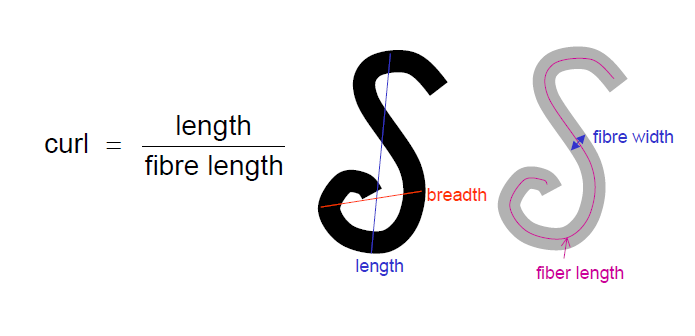

In [13]:
X['fibrelength'] = (X['Perimeter'] - np.sqrt(abs((X['Perimeter'])**2 - (16 * X['Area'])))) / 4

#X['fibrewidth'] = (X['Area'] / X['fibrelength'])/1000

X['curl'] = X['MajorAxisLength'] / X['fibrelength']


X_val['fibrelength'] = (X_val['Perimeter'] - np.sqrt(abs((X_val['Perimeter'])**2 - (16 * X_val['Area'])))) / 4

#X_val['fibrewidth'] = (X_val['Area'] / X_val['fibrelength'])/1000

X_val['curl'] = X_val['MajorAxisLength'] / X_val['fibrelength']


df_test['fibrelength'] = (df_test['Perimeter'] - np.sqrt(abs((df_test['Perimeter'])**2 - (16 * df_test['Area'])))) / 4

#df_test['fibrewidth'] = (df_test['Area'] / df_test['fibrelength'])/1000

df_test['curl'] = df_test['MajorAxisLength'] / df_test['fibrelength']

X.drop('fibrelength',axis=1,inplace =True)
X_val.drop('fibrelength',axis=1,inplace =True)
df_test.drop('fibrelength',axis=1,inplace =True)

In [14]:
 X['curl'].min()

1.3518615518494637

# Solidity

####  the min value in training is 0.91 
#### so most of the beans are solide with slightly deffirent  
#### low Solidity mean that object having anirregular boundary, or containing holes

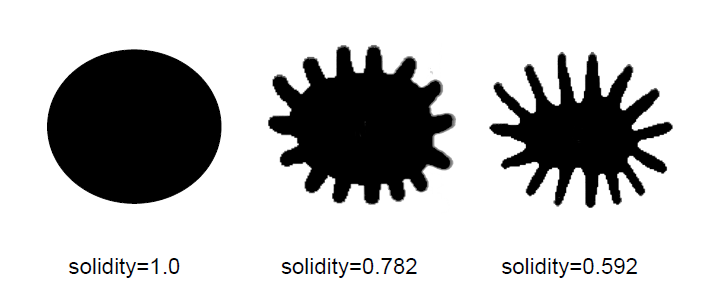

# roundness 


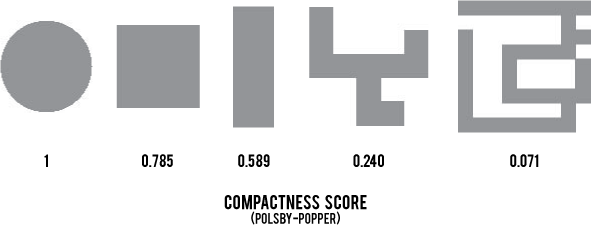

In [15]:
#measure of deviation from roundness
X['Round'] = X['roundness'] * X['Solidity']
X_val['Round'] = X_val['roundness'] * X_val['Solidity']
df_test['Round'] = df_test['roundness'] * df_test['Solidity']



In [16]:
 X['Extent'].max()

0.8661946405648266

# Extent 
### elongation  the min 0.5 max 0.9 
#### to 8 categories 


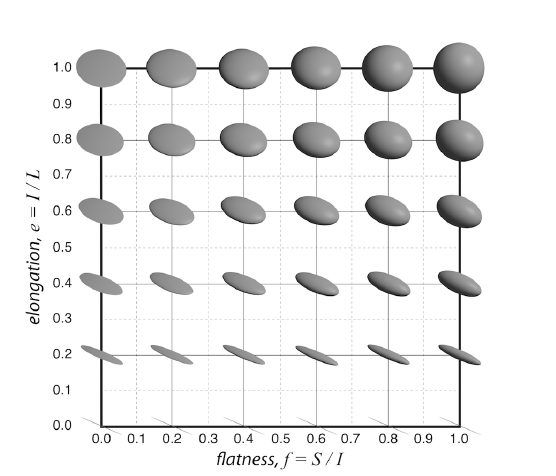

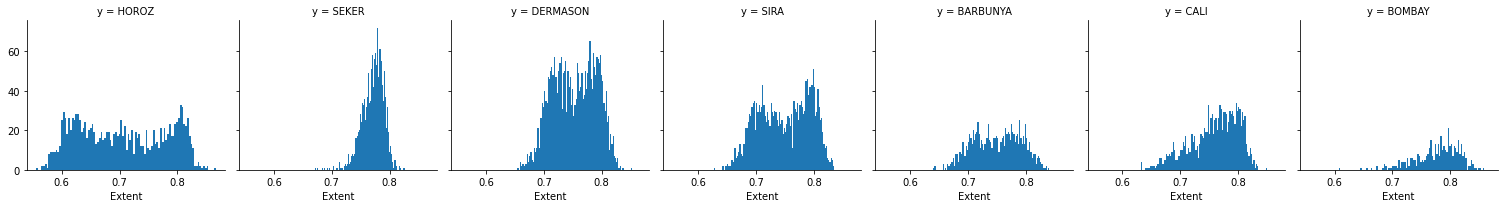

In [17]:
g = sns.FacetGrid(df_train, col='y')

g.map(plt.hist,'Extent', bins=100)
plt.show()

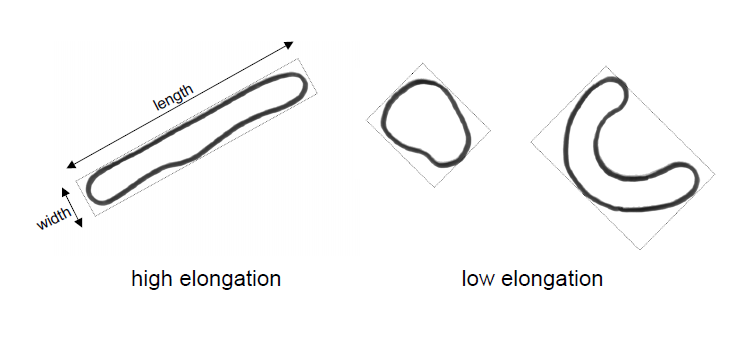

In [18]:
X['elongation'] = pd.cut(X['Extent'], bins=10 , labels=np.arange(10), right=False)
X_val['elongation'] = pd.cut(X_val['Extent'], bins=10 , labels=np.arange(10), right=False)
df_test['elongation'] = pd.cut(df_test['Extent'], bins=10 , labels=np.arange(10), right=False)

X.drop('Extent',axis=1,inplace =True)
X_val.drop('Extent',axis=1,inplace =True)
df_test.drop('Extent',axis=1,inplace =True)
X.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,circular,curl,Round,elongation
1176,85446,1104.639,431.766247,254.775038,1.694696,0.807347,86852,329.838182,0.983812,0.879956,0.763928,0.005053,0.001062,0.583585,0.989000,2,2.394205,0.865711,8
3931,46826,851.033,348.057690,172.358999,2.019376,0.868778,47442,244.173534,0.987016,0.812464,0.701532,0.007433,0.001111,0.492147,0.993830,3,2.008848,0.801915,8
10363,57649,896.189,323.546760,228.391768,1.416631,0.708311,58415,270.926164,0.986887,0.901991,0.837363,0.005612,0.001702,0.701177,0.993309,1,2.349253,0.890164,7
9720,41826,772.831,294.586813,181.312184,1.624749,0.788153,42287,230.769403,0.989098,0.880009,0.783366,0.007043,0.001636,0.613663,0.997048,2,2.335214,0.870415,7
8455,34879,689.973,236.193130,188.398162,1.253691,0.603128,35298,210.735194,0.988130,0.920682,0.892216,0.006772,0.002647,0.796049,0.997999,0,2.340780,0.909753,6


# Hole Area Ratio
#### HAR is the ratio: (area of the holes)/(area of shape)

#### Area Ratio

In [19]:
# area ratio
X['ARatio'] = X['Area']/ X['ConvexArea']
X_val['ARatio'] = X_val['Area'] /X_val['ConvexArea']
df_test['ARatio'] = df_test['Area'] / df_test['ConvexArea']



X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,circular,curl,Round,elongation,ARatio
1176,85446,1104.639,431.766247,254.775038,1.694696,0.807347,86852,329.838182,0.983812,0.879956,0.763928,0.005053,0.001062,0.583585,0.989000,2,2.394205,0.865711,8,0.983812
3931,46826,851.033,348.057690,172.358999,2.019376,0.868778,47442,244.173534,0.987016,0.812464,0.701532,0.007433,0.001111,0.492147,0.993830,3,2.008848,0.801915,8,0.987016
10363,57649,896.189,323.546760,228.391768,1.416631,0.708311,58415,270.926164,0.986887,0.901991,0.837363,0.005612,0.001702,0.701177,0.993309,1,2.349253,0.890164,7,0.986887
9720,41826,772.831,294.586813,181.312184,1.624749,0.788153,42287,230.769403,0.989098,0.880009,0.783366,0.007043,0.001636,0.613663,0.997048,2,2.335214,0.870415,7,0.989098
8455,34879,689.973,236.193130,188.398162,1.253691,0.603128,35298,210.735194,0.988130,0.920682,0.892216,0.006772,0.002647,0.796049,0.997999,0,2.340780,0.909753,6,0.988130


### check for any NAN value 

In [20]:
COLUMNS = X.columns.tolist()
for c in COLUMNS:
    if X[c].isnull().values.any():
        print('{0}: {1} invalid values found'.format(c, X[c].isnull().sum()))
    else:
        print('{0}: ok'.format(c))

Area: ok
Perimeter: ok
MajorAxisLength: ok
MinorAxisLength: ok
AspectRation: ok
Eccentricity: ok
ConvexArea: ok
EquivDiameter: ok
Solidity: ok
roundness: ok
Compactness: ok
ShapeFactor1: ok
ShapeFactor2: ok
ShapeFactor3: ok
ShapeFactor4: ok
circular: ok
curl: ok
Round: ok
elongation: ok
ARatio: ok


In [21]:
X.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,circular,curl,Round,elongation,ARatio
1176,85446,1104.639,431.766247,254.775038,1.694696,0.807347,86852,329.838182,0.983812,0.879956,0.763928,0.005053,0.001062,0.583585,0.989000,2,2.394205,0.865711,8,0.983812
3931,46826,851.033,348.057690,172.358999,2.019376,0.868778,47442,244.173534,0.987016,0.812464,0.701532,0.007433,0.001111,0.492147,0.993830,3,2.008848,0.801915,8,0.987016
10363,57649,896.189,323.546760,228.391768,1.416631,0.708311,58415,270.926164,0.986887,0.901991,0.837363,0.005612,0.001702,0.701177,0.993309,1,2.349253,0.890164,7,0.986887
9720,41826,772.831,294.586813,181.312184,1.624749,0.788153,42287,230.769403,0.989098,0.880009,0.783366,0.007043,0.001636,0.613663,0.997048,2,2.335214,0.870415,7,0.989098
8455,34879,689.973,236.193130,188.398162,1.253691,0.603128,35298,210.735194,0.988130,0.920682,0.892216,0.006772,0.002647,0.796049,0.997999,0,2.340780,0.909753,6,0.988130


# drop  columns 


In [22]:
d_column = ['Area',
            'Perimeter' ,
            'MajorAxisLength' ,
            'MinorAxisLength',
            'AspectRation',
            'Eccentricity',
            'ConvexArea',
            'EquivDiameter',
            'Solidity',
            'roundness',
            'Compactness',
            'ShapeFactor3'
           ]

In [23]:
#now drop feature
X.drop(d_column,axis=1,inplace =True)
X_val.drop(d_column,axis=1,inplace =True)
df_test.drop(d_column,axis=1,inplace =True)

In [24]:
X.head()

,ShapeFactor1,ShapeFactor2,ShapeFactor4,circular,curl,Round,elongation,ARatio
1176,0.005053,0.001062,0.989000,2,2.394205,0.865711,8,0.983812
3931,0.007433,0.001111,0.993830,3,2.008848,0.801915,8,0.987016
10363,0.005612,0.001702,0.993309,1,2.349253,0.890164,7,0.986887
9720,0.007043,0.001636,0.997048,2,2.335214,0.870415,7,0.989098
8455,0.006772,0.002647,0.997999,0,2.340780,0.909753,6,0.988130


# Correlation 

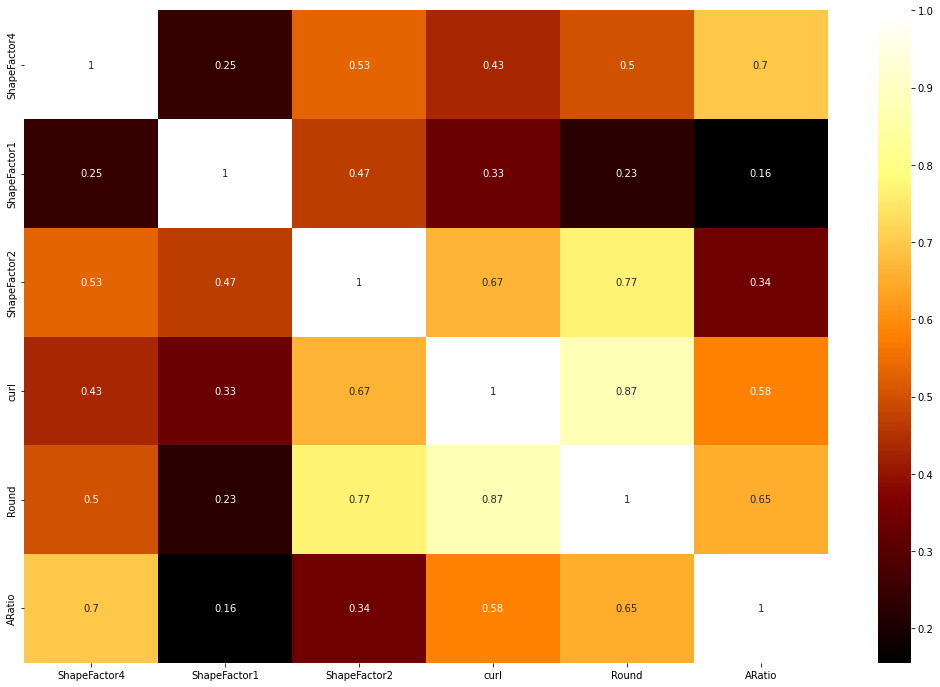

In [25]:
#'Extent',
"""corr_col =['ShapeFactor1',
            'ShapeFactor2',
           'ShapeFactor3',
            'ShapeFactor4',
            'curl',
            'Round',
            'ARatio'
            ]"""

corr_col =[
            'ShapeFactor4',
            'ShapeFactor1',
            'ShapeFactor2',
            'curl',
            'Round',
            'ARatio'
            ]
df_temp =X[corr_col].copy()
plt.figure(figsize=(18,12))
sns.heatmap(X[corr_col].corr(), yticklabels='auto', annot=True, cmap=plt.cm.afmhot)
plt.show()

# some of the feature are very high correlated 

In [26]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

## drop feature with correlation more than 85%

In [27]:
#return number of correlated feature

corr_features = correlation(X[corr_col],0.9)
len(set(corr_features))

0

In [28]:
corr_features

set()

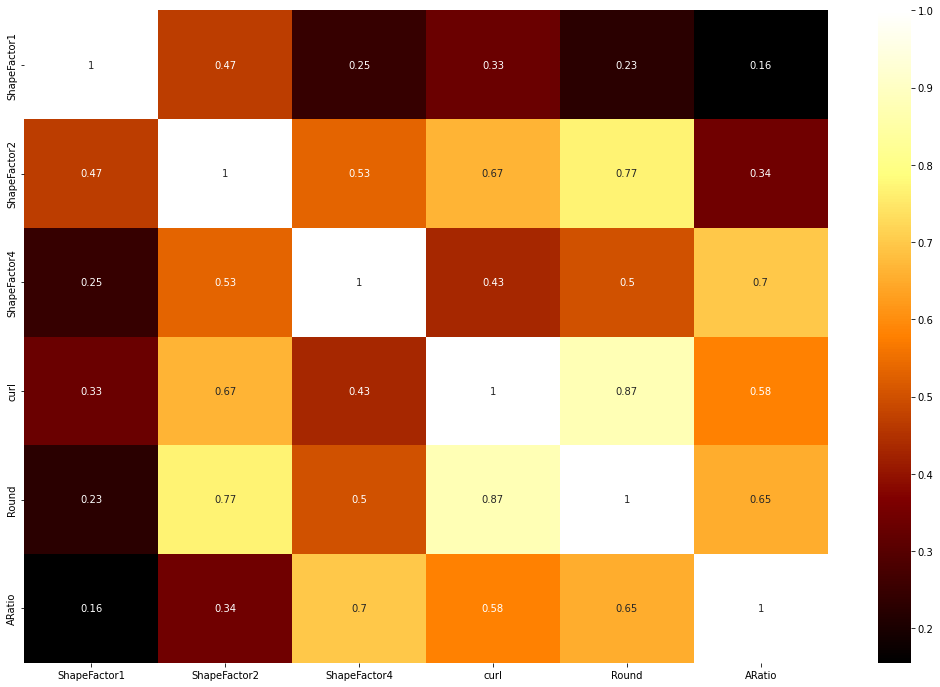

In [29]:
#now drop feature and polt heatmap for the remaining features 
X.drop(corr_features,axis=1,inplace =True)
X_val.drop(corr_features,axis=1,inplace =True)
df_test.drop(corr_features,axis=1,inplace =True)
plt.figure(figsize=(18,12))
sns.heatmap(X.corr(), yticklabels='auto', annot=True, cmap=plt.cm.afmhot)
plt.show()

In [30]:
col = X.columns.tolist()
col.remove('elongation')
col.remove('circular')
col

['ShapeFactor1', 'ShapeFactor2', 'ShapeFactor4', 'curl', 'Round', 'ARatio']

In [31]:
X.head()

,ShapeFactor1,ShapeFactor2,ShapeFactor4,circular,curl,Round,elongation,ARatio
1176,0.005053,0.001062,0.989000,2,2.394205,0.865711,8,0.983812
3931,0.007433,0.001111,0.993830,3,2.008848,0.801915,8,0.987016
10363,0.005612,0.001702,0.993309,1,2.349253,0.890164,7,0.986887
9720,0.007043,0.001636,0.997048,2,2.335214,0.870415,7,0.989098
8455,0.006772,0.002647,0.997999,0,2.340780,0.909753,6,0.988130


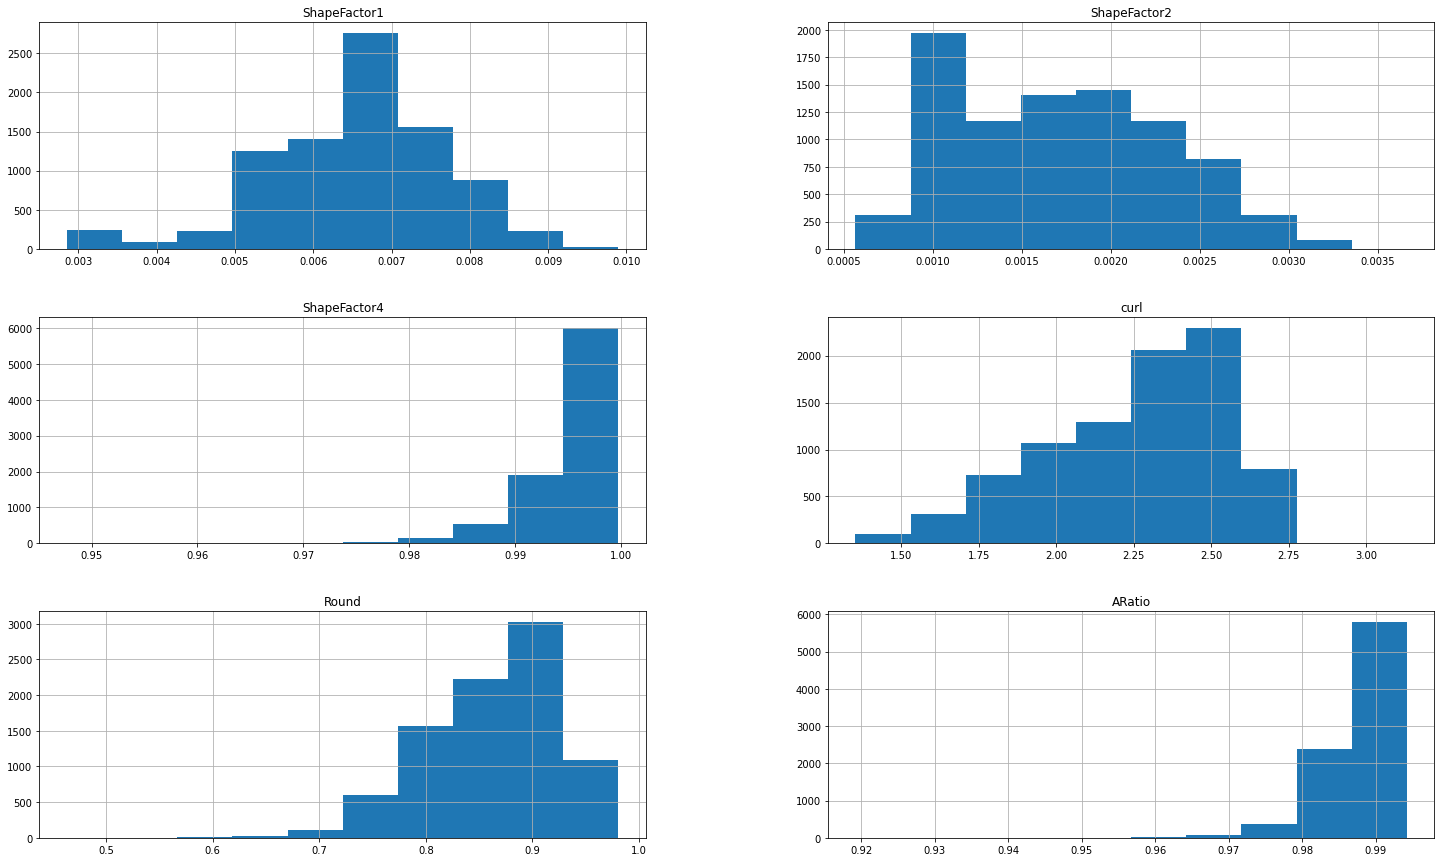

In [32]:
X.hist(figsize=(25, 15))
plt.show()

### find skewed columns



##### get the positive skewed featuers in list 
##### get the negativelly skewed features in another list 

In [33]:
from scipy.stats import skew, norm, probplot, boxcox, f_oneway


skewed_features = X[col].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)

#compute skewness
skewness = pd.DataFrame({'Skew' :skewed_features})   

# Get only higest right skewed features
skewness_r = skewness[(skewness) > 0.8]
skewness_r = skewness_r.dropna()
print ("There are {} higest skewed numerical features to  transform".format(skewness_r.shape[0]))
col_skew_r = list( skewness_r.index)
print (col_skew_r)
# Get only higest skewed left features
skewness_l = skewness[(skewness)< - 0.8]
skewness_l = skewness_l.dropna()
print ("There are {} higest skewed numerical features to transform".format(skewness_l.shape[0]))
col_skew_l = list( skewness_l.index)

print (col_skew_l)

There are 0 higest skewed numerical features to  transform
[]
There are 2 higest skewed numerical features to transform
['ARatio', 'ShapeFactor4']


In [34]:
"""#apply log transformation to positive skew column 

for col in col_skew_r:
    X[col] = np.log1p(X[col])
    X_val[col] = np.log1p(X_val[col])
    df_test[col] = np.log1p(df_test[col])
"""

'#apply log transformation to positive skew column \n\nfor col in col_skew_r:\n    X[col] = np.log1p(X[col])\n    X_val[col] = np.log1p(X_val[col])\n    df_test[col] = np.log1p(df_test[col])\n'

In [35]:
"""#apply power transformation to negative skew feature 
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer(method='yeo-johnson')
for col2 in col_skew_l:
    X[col2] = power.fit_transform(X[col2].values.reshape(-1,1))
    X_val[col2] = power.transform(X_val[col2].values.reshape(-1,1))
    df_test[col2] = power.transform(df_test[col2].values.reshape(-1,1))

"""

"#apply power transformation to negative skew feature \nfrom sklearn.preprocessing import PowerTransformer\n\npower = PowerTransformer(method='yeo-johnson')\nfor col2 in col_skew_l:\n    X[col2] = power.fit_transform(X[col2].values.reshape(-1,1))\n    X_val[col2] = power.transform(X_val[col2].values.reshape(-1,1))\n    df_test[col2] = power.transform(df_test[col2].values.reshape(-1,1))\n\n"

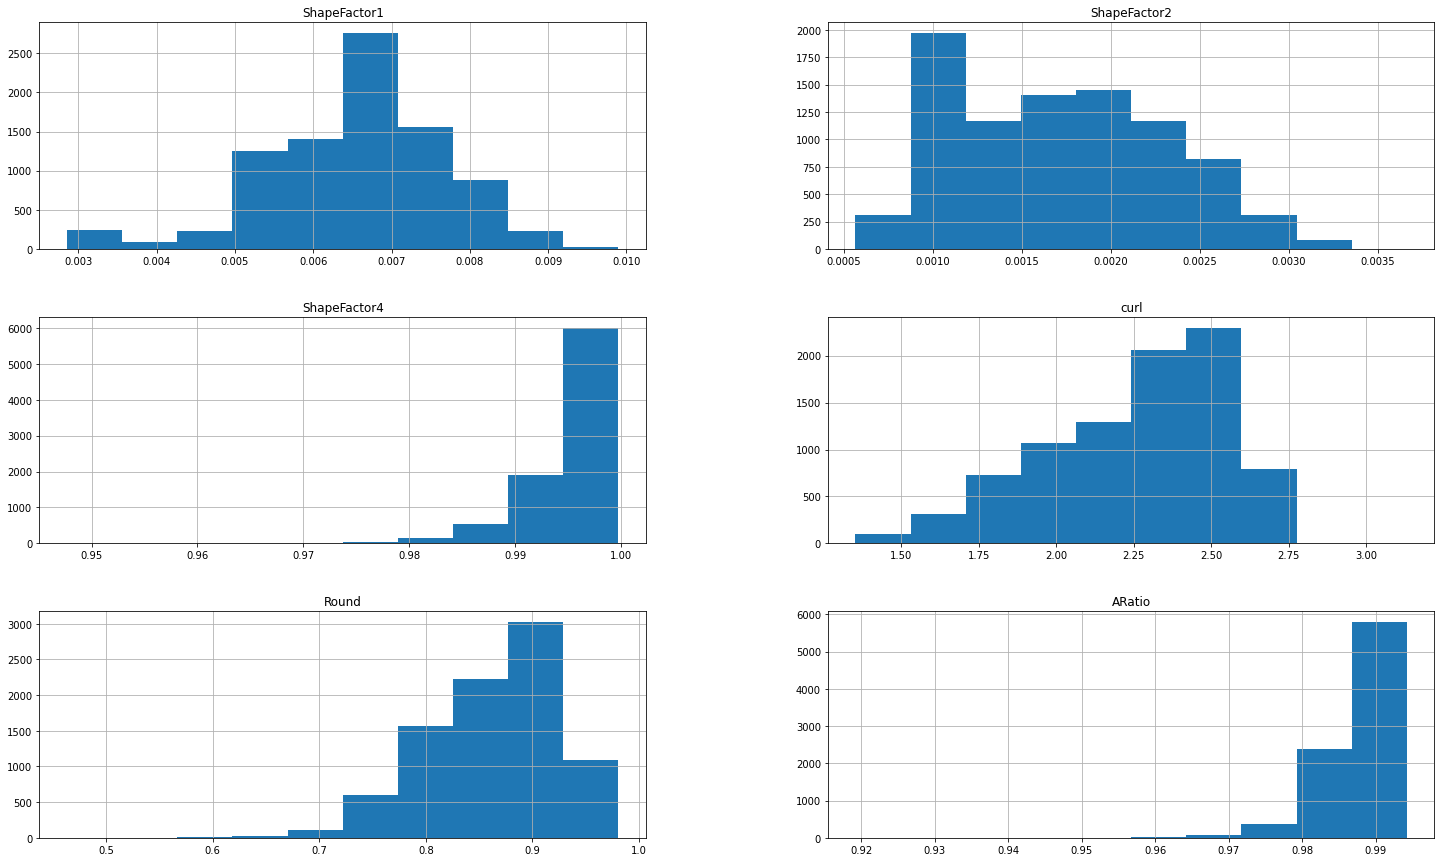

In [36]:
X.hist(figsize=(25, 15))
plt.show()

## Now applying Z-score to all columns 

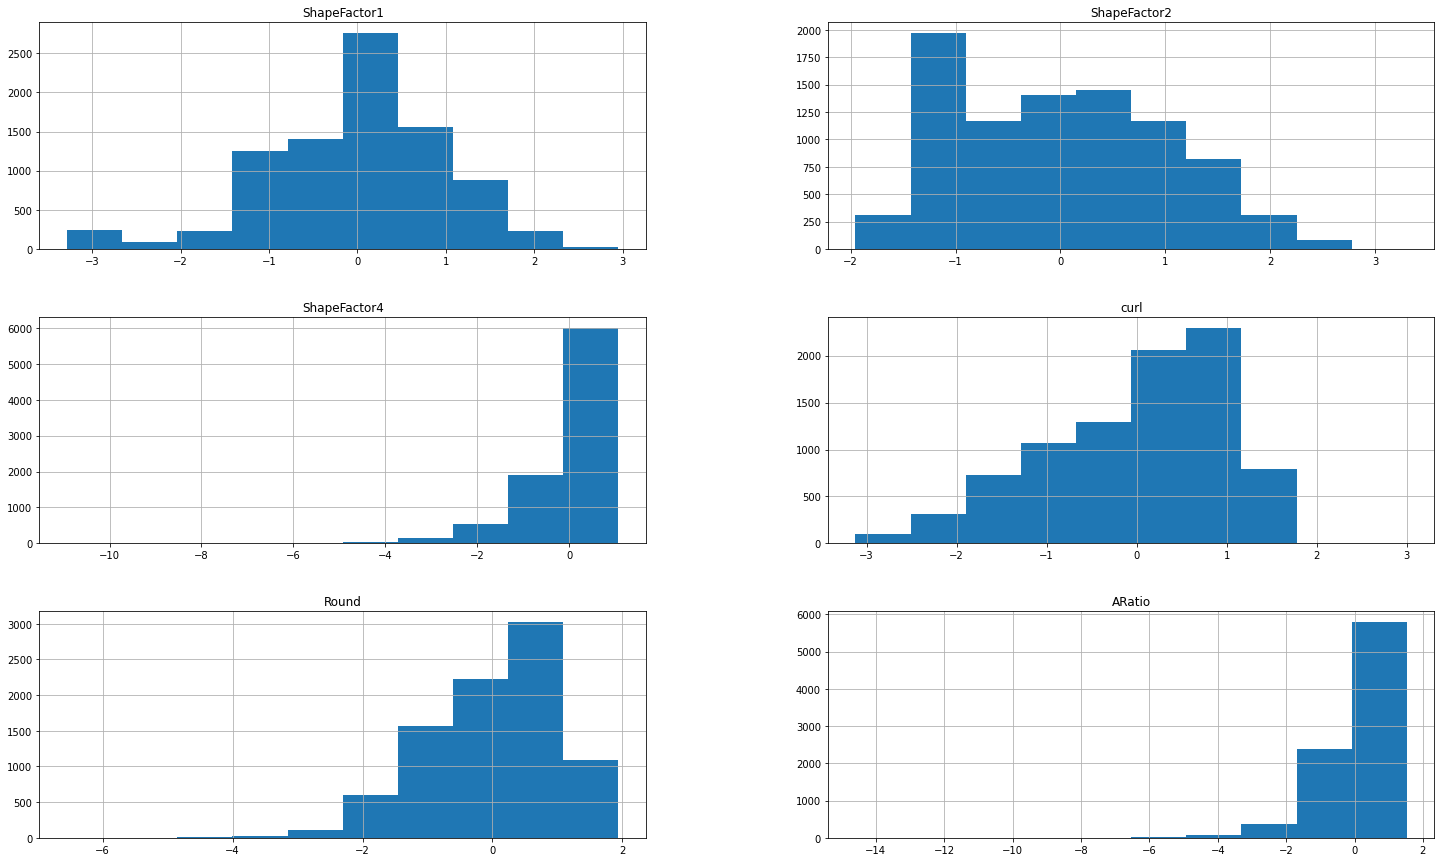

In [37]:

#scaler = MinMaxScaler()
scaler = StandardScaler()
X[col] = scaler.fit_transform(X[col])
X_val[col] = scaler.transform(X_val[col])
df_test[col] = scaler.transform(df_test[col])
X.hist(figsize=(25, 15))
plt.show()

### now plot all features and target 

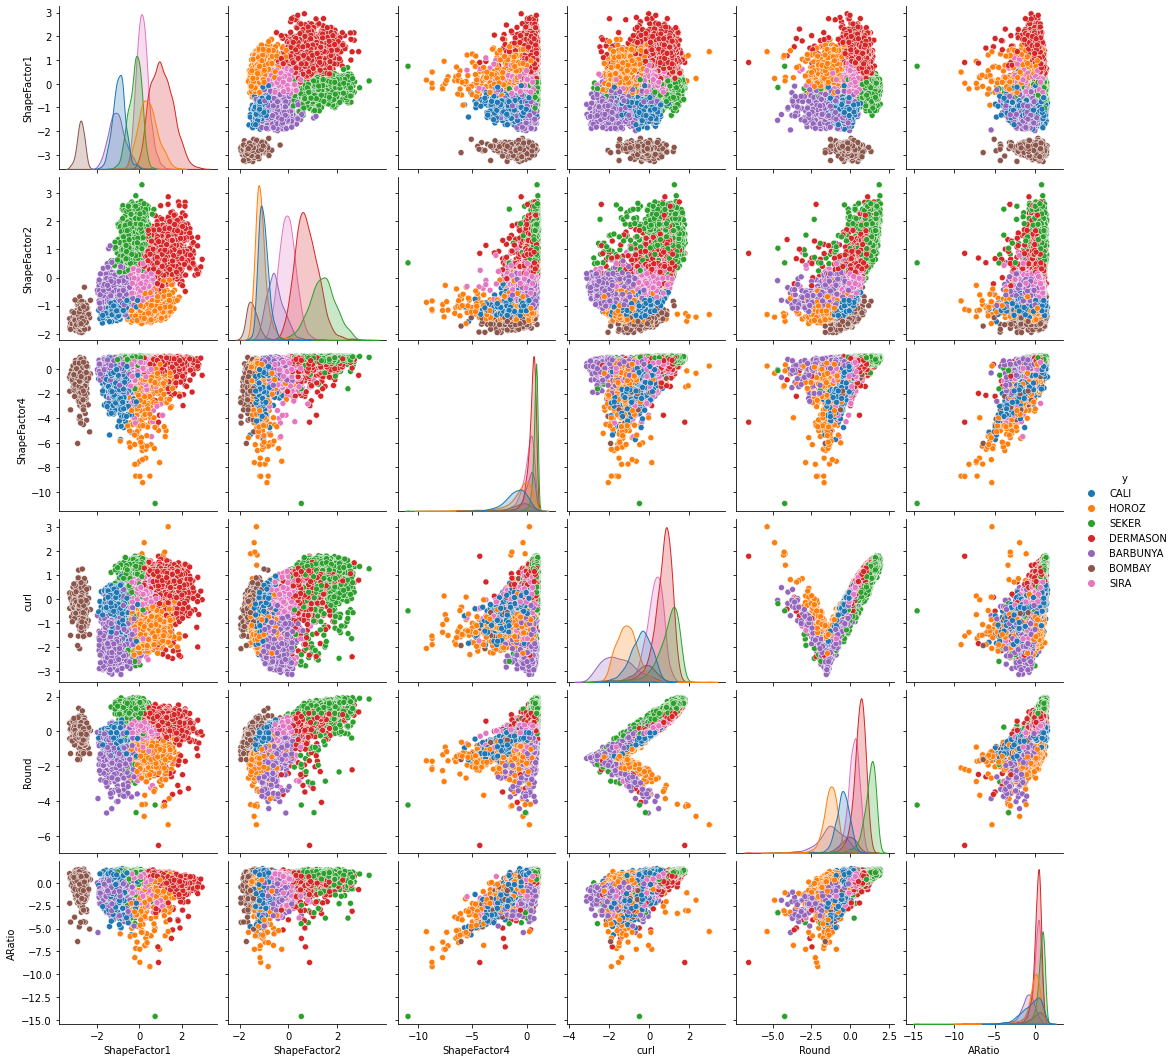

In [38]:
temp = X.copy()
temp['y']=y
sns.pairplot(temp, hue="y")

## now label the target

In [39]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)

le.classes_

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [40]:
y=le.transform(y)
y_val =le.transform(y_val)


# One Hot Encoding for categorical features 

In [41]:
X.head()

,ShapeFactor1,ShapeFactor2,ShapeFactor4,circular,curl,Round,elongation,ARatio
1176,-1.337866,-1.110646,-1.401044,2,0.464765,0.054136,8,-0.714438
3931,0.770261,-1.027638,-0.287624,3,-0.861877,-0.993359,8,-0.025539
10363,-0.842467,-0.025021,-0.407657,1,0.310012,0.455640,7,-0.053230
9720,0.424931,-0.136878,0.454349,2,0.261681,0.131386,7,0.422214
8455,0.184557,1.576617,0.673597,0,0.280844,0.777292,6,0.213952


In [42]:
def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data = data.drop([column], axis=1)
    return data

#cols = ['fibrewidth','curl_cat','Solidity_new','roundness_label','elongation']
cols = ['elongation','circular']
for col in cols:
    X = one_hot_encoding(X, col)
    X_val = one_hot_encoding(X_val, col)
    df_test  = one_hot_encoding(df_test, col)

In [43]:
X.head()

,ShapeFactor1,ShapeFactor2,ShapeFactor4,curl,Round,ARatio,elongation_0,elongation_1,elongation_2,elongation_3,elongation_4,elongation_5,elongation_6,elongation_7,elongation_8,elongation_9,circular_0,circular_1,circular_2,circular_3
1176,-1.337866,-1.110646,-1.401044,0.464765,0.054136,-0.714438,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3931,0.770261,-1.027638,-0.287624,-0.861877,-0.993359,-0.025539,0,0,0,0,0,0,0,0,1,0,0,0,0,1
10363,-0.842467,-0.025021,-0.407657,0.310012,0.455640,-0.053230,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9720,0.424931,-0.136878,0.454349,0.261681,0.131386,0.422214,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8455,0.184557,1.576617,0.673597,0.280844,0.777292,0.213952,0,0,0,0,0,0,1,0,0,0,1,0,0,0


# Model

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, make_scorer
import xgboost as xgb
import random


## the best n_neighbors fro KNN 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


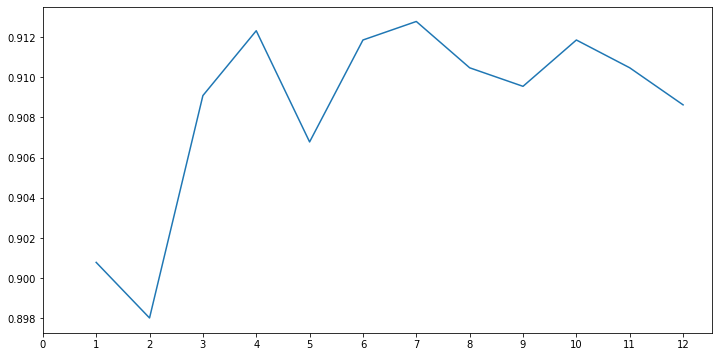

Accuracies for different values of n are: [0.90078449 0.89801569 0.90909091 0.91232118 0.90678357 0.91185971
 0.91278265 0.91047531 0.90955238 0.91185971 0.91047531 0.90862944] with the max value as  0.912782648823258


In [45]:
a_index=list(range(1,13))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10,11,12]
for i in list(range(1,13)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X,y)
    prediction=model.predict(X_val)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_val)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

## the best param for SVM

In [46]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'C': [1, 10, 100, 1000] ,'degree':[1,2] }
              ]

In [47]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'degree': [1, 2],
                          'kernel': ['poly']}])

In [48]:

print('Best score :',svm_model.best_score_,"\n") 
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
print('Best degree:',svm_model.best_estimator_.degree,"\n")

Best score : 0.9259256005446881 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 

Best degree: 3 



## the best param for AdaBoost

In [49]:
params_ada = {
    "n_estimators": [5, 10, 15, 20, 25, 40],
    "learning_rate": [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
}

In [50]:

f1 = make_scorer(f1_score , average = "weighted")

In [51]:
gs_ada = GridSearchCV(AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 10, n_estimators = 20, random_state = 42)), 
                      param_grid = params_ada, scoring = f1, cv = 4, n_jobs = -1)

In [52]:
gs_ada.fit(X, y)

GridSearchCV(cv=4,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=10,
                                                                                n_estimators=20,
                                                                                random_state=42)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.4, 0.6, 0.8, 1.0],
                         'n_estimators': [5, 10, 15, 20, 25, 40]},
             scoring=make_scorer(f1_score, average=weighted))

In [53]:
gs_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 5}

In [54]:
LR= gs_ada.best_params_.get('learning_rate')
N_estimators= gs_ada.best_params_.get('n_estimators')
print (LR ,N_estimators)

0.1 5


In [55]:
svc = SVC(kernel=svm_model.best_estimator_.kernel, 
          degree= svm_model.best_estimator_.degree,
          gamma=svm_model.best_estimator_.gamma, 
          coef0=1, 
          C=svm_model.best_estimator_.C,
          probability=True)

knc = KNeighborsClassifier(n_neighbors=7)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=42)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=42)
abc =gs_ada = GridSearchCV(AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 10, n_estimators = 20, random_state = 42)), 
                      param_grid = params_ada, scoring = f1, cv = 4, n_jobs = -1) 

bc = BaggingClassifier(n_estimators=5, random_state=42)
etc = ExtraTreesClassifier(n_estimators=9, random_state=42)
clf_mlp = MLPClassifier( random_state=42,warm_start=True,hidden_layer_sizes=(40),alpha=0.05)
ada=AdaBoostClassifier(base_estimator = RandomForestClassifier(max_depth = 10, n_estimators = N_estimators, random_state = 42), n_estimators = N_estimators, learning_rate = LR, random_state = 42)

In [56]:
clfs = {'SVC' : svc,'KN' : knc, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc , 'MLp':clf_mlp ,'ADA' :ada}

In [57]:
def train_classifier(clf, X, y):    
    clf.fit(X, y)

In [58]:
def predict_labels(clf, X_val):
    return (clf.predict(X_val))

In [59]:
#Now iterate through classifiers and save the results

pred_scores = []
for k,v in clfs.items():
    train_classifier(v, X, y)
    pred = predict_labels(v,X_val)
    pred_scores.append((k, [ f1_score(y_val, pred, average='micro')]))
   

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [60]:
df = pd.DataFrame(pred_scores)
df

,0,1
0,SVC,[0.9326257498846331]
1,KN,[0.912782648823258]
2,DT,[0.8910936778957084]
3,LR,[0.8943239501615136]
4,RF,[0.925703737886479]
5,AdaBoost,[0.9224734656206738]
6,BgC,[0.9141670512228888]
7,ETC,[0.9086294416243654]
8,MLp,[0.9367789570835257]
9,ADA,[0.9210890632210429]


## Voting classifier

In [61]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('RF', rfc), ('MLp', clf_mlp),('KN' , knc),( 'SVC' , svc),( 'ADA' , ada)], voting='soft' )



In [62]:
#eclf.fit(X,y)

In [63]:
#pred_v = eclf.predict(X_val)

In [64]:
#print( f1_score(y_val, pred_v, average='micro'))

## submit best model pred

In [65]:
X_test = df_test.drop(columns=['ID'])
X_test.head()

,ShapeFactor1,ShapeFactor2,ShapeFactor4,curl,Round,ARatio,elongation_0,elongation_1,elongation_2,elongation_3,elongation_4,elongation_5,elongation_6,elongation_7,elongation_8,elongation_9,circular_0,circular_1,circular_2,circular_3
0,0.143126,-1.233673,-7.420425,-1.546976,-1.675277,-6.267853,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1.266807,1.098636,0.663606,0.570646,0.597823,0.145659,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,-0.810275,0.235619,0.122140,-1.694772,-0.854750,-1.779640,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1.828269,1.372205,0.811272,1.222831,0.977614,0.249858,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,-2.535943,-1.247682,-0.754814,-0.306297,-0.085915,0.027703,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [66]:
y_test_predicted = le.inverse_transform(clf_mlp.predict(X_test))

df_test['y'] = y_test_predicted

df_test.head()

,ID,ShapeFactor1,ShapeFactor2,ShapeFactor4,curl,Round,ARatio,elongation_0,elongation_1,elongation_2,elongation_3,elongation_4,elongation_5,elongation_6,elongation_7,elongation_8,elongation_9,circular_0,circular_1,circular_2,circular_3,y
0,10834,0.143126,-1.233673,-7.420425,-1.546976,-1.675277,-6.267853,0,1,0,0,0,0,0,0,0,0,0,0,1,0,HOROZ
1,10835,1.266807,1.098636,0.663606,0.570646,0.597823,0.145659,0,0,0,0,0,0,0,1,0,0,0,1,0,0,DERMASON
2,10836,-0.810275,0.235619,0.122140,-1.694772,-0.854750,-1.779640,0,0,0,0,0,0,1,0,0,0,0,1,0,0,BARBUNYA
3,10837,1.828269,1.372205,0.811272,1.222831,0.977614,0.249858,0,0,0,0,0,1,0,0,0,0,0,1,0,0,DERMASON
4,10838,-2.535943,-1.247682,-0.754814,-0.306297,-0.085915,0.027703,0,0,0,0,0,0,0,0,1,0,0,1,0,0,BOMBAY


In [67]:
df_test[['ID', 'y']].to_csv('./submission.csv', index=False)